K Value vs Accuracy:
K=1 → Accuracy: 0.97
K=2 → Accuracy: 1.00
K=3 → Accuracy: 1.00
K=4 → Accuracy: 1.00
K=5 → Accuracy: 1.00
K=6 → Accuracy: 1.00
K=7 → Accuracy: 1.00
K=8 → Accuracy: 1.00
K=9 → Accuracy: 1.00
K=10 → Accuracy: 1.00

✅ Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



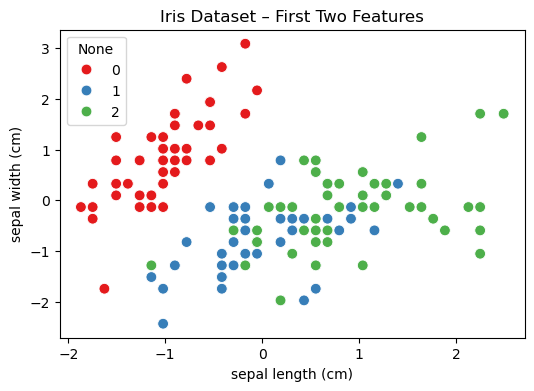

In [5]:
# ✅ Step 1: Install packages (only if missing) - Safe for Anaconda default channel
# Uncomment and run this line if any package is missing:
# !conda install -y pandas scikit-learn matplotlib seaborn

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Load Dataset (No download needed, built-in)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Step 4: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Try different K values and print accuracy
print("K Value vs Accuracy:")
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"K={k} → Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Step 7: Choose best K (example: 3)
best_k = 3
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Model Evaluation
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Simple Visualization (First 2 Features)
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='Set1', s=60
)
plt.title("Iris Dataset – First Two Features")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
